In [143]:
__author__="William Huanshan Chuang"
__version__="1.0.1"
__email__="wchuang2@mail.sfsu.edu"

#define elementary functions
import math
import statistics
import numpy as np
from numpy.linalg import eig
def Cartesian_complex_mul(numb1,numb2):
    #numb1 a+bi, [a,b], numb2 c+di, [c,d]
    x=numb1[0]*numb2[0]-numb1[1]*numb2[1]
    y=numb1[0]*numb2[1]+numb1[1]*numb2[0]
    return [x,y]

def Cartesian_complex_scalar_mul(alpha,numb1):
    #numb1 a+bi, [a,b], numb2 c+di, [c,d]
    x=numb1[0]*alpha
    y=numb1[1]*alpha
    return [x,y]

def Cartesian_complex_add(numb1,numb2):
    #numb1 a+bi, [a,b], numb2 c+di, [c,d]
    x=numb1[0]+numb2[0]
    y=numb1[1]+numb2[1]
    return [x,y]

def Cartesian_complex_divide(numb1,numb2):
    #numb1 u+vi, [u,v], numb2 x+yi, [x,y]
    d=numb2[0]*numb2[0]+numb2[1]*numb2[1]
    nx=numb1[0]*numb2[0]+numb1[1]*numb2[1]
    ny=numb1[1]*numb2[0]-numb1[0]*numb2[1]
    X=float(nx/d)
    Y=float(ny/d)
    return[X,Y]

def Cartesian_complex_modulus(numb):
    return math.sqrt(numb[0]*numb[0]+numb[1]*numb[1])

def Cartesian_complex_complex_conjugate(numb):
    return [numb[0],-numb[1]]

def Cartesian_complex_complex_to_polar(numb):
    r=Cartesian_complex_modulus(numb)
    if numb[0]>0:
        t=math.atan(float(numb[1]/numb[0]))
    elif numb[0]<0:
        t=math.atan(float(numb[1]/numb[0]))+math.pi
    else:
        if numb[1]>0:
            t=float(math.pi/2)
        elif numb[1]<0:
            t=float(-math.pi/2)
        else:
            t="null"
    return [r,t]

def Polar_complex_complex_to_Cartesian(numb):
    return [numb[0]*math.cos(numb[1]),numb[0]*math.sin(numb[1])]

def Polar_complex_conjugate(numb):
    return [numb[0],-numb[1]]

def Polar_complex_mul(numb1,numb2):
    #numb1 r_1e^(it_1), [r_1,t_1], numb2 r_2e^(it_2), [r_2,t_2]
    r=numb1[0]*numb2[0]
    t=numb1[1]+numb2[1]
    return [r,t]

def Polar_complex_divide(numb1,numb2):
    #numb1 r_1e^(it_1), [r_1,t_1], numb2 r_2e^(it_2), [r_2,t_2]
    r=float(numb1[0]/numb2[0])
    t=numb1[1]-numb2[1]
    return [r,t]

def Polar_complex_add(numb1,numb2):
    N1=Polar_complex_complex_to_Cartesian(numb1)
    N2=Polar_complex_complex_to_Cartesian(numb2)
    tot=Cartesian_complex_add(N1,N2)
    return Cartesian_complex_complex_to_polar(tot)

def real_matrix_addition(m1,m2):
    #m1=[[M11,M12],[M21,M22]]
    a=m1[0][0]+m2[0][0]
    b=m1[0][1]+m2[0][1]
    c=m1[1][0]+m2[1][0]
    d=m1[1][1]+m2[1][1]
    l1=[a,b]
    l2=[c,d]
    l=[]
    l.append(l1)
    l.append(l2)
    return l

def Cartesian_complex_matrix_addition(m1,m2):
    #m1=[[M11,M12],[M21,M22]]
    #M11=[a,b]
    a1=m1[0][0][0]+m2[0][0][0]
    a2=m1[0][0][1]+m2[0][0][1]
    b1=m1[0][1][0]+m2[0][1][0]
    b2=m1[0][1][1]+m2[0][1][1]
    c1=m1[1][0][0]+m2[1][0][0]
    c2=m1[1][0][1]+m2[1][0][1]
    d1=m1[1][1][0]+m2[1][1][0]
    d2=m1[1][1][1]+m2[1][1][1]
    a=[a1,a2]
    b=[b1,b2]
    c=[c1,c2]
    d=[d1,d2]
    l1=[a,b]
    l2=[c,d]
    l=[]
    l.append(l1)
    l.append(l2)
    return l

def real_matrix_multiplication(m1,m2):
    #m1=[[M11,M12],[M21,M22]]
    a=m1[0][0]*m2[0][0]+m1[0][1]*m2[1][0]
    b=m1[0][0]*m2[0][1]+m1[0][1]*m2[1][1]
    c=m1[1][0]*m2[0][0]+m1[1][1]*m2[1][0]
    d=m1[1][0]*m2[0][1]+m1[1][1]*m2[1][1]
    l1=[a,b]
    l2=[c,d]
    l=[]
    l.append(l1)
    l.append(l2)
    return l

def Cartesian_complex_matrix_multiplication(m1,m2):
    #m1=[[M11,M12],[M21,M22]]
    #M11=[a,b]
    a=Cartesian_complex_add(Cartesian_complex_mul(m1[0][0],m2[0][0]),Cartesian_complex_mul(m1[0][1],m2[1][0])) 
    b=Cartesian_complex_add(Cartesian_complex_mul(m1[0][0],m2[0][1]),Cartesian_complex_mul(m1[0][1],m2[1][1])) 
    c=Cartesian_complex_add(Cartesian_complex_mul(m1[1][0],m2[0][0]),Cartesian_complex_mul(m1[1][1],m2[1][0])) 
    d=Cartesian_complex_add(Cartesian_complex_mul(m1[1][0],m2[0][1]),Cartesian_complex_mul(m1[1][1],m2[1][1])) 
    l1=[a,b]
    l2=[c,d]
    l=[]
    l.append(l1)
    l.append(l2)
    return l

def real_matrix_inverse(m1):
    #m1=[[M11,M12],[M21,M22]]
    det=m1[0][0]*m1[1][1]-m1[0][1]*m1[1][0]
    a=float(m1[1][1]/det)
    b=float(-m1[0][1]/det)
    c=float(-m1[1][0]/det)
    d=float(m1[0][0]/det)
    l1=[a,b]
    l2=[c,d]
    l=[]
    l.append(l1)
    l.append(l2)
    return l

def Cartesian_complex_matrix_inverse(m1):
    #m1=[[M11,M12],[M21,M22]]
    #M11=[a,b]
    det=Cartesian_complex_add(Cartesian_complex_mul(m1[0][0],m1[1][1]),Cartesian_complex_scalar_mul(-1,Cartesian_complex_mul(m1[0][1],m1[1][0])))   
    inverse_det=Cartesian_complex_divide([1,0],det)
    a=Cartesian_complex_mul(m1[1][1],inverse_det)
    b=Cartesian_complex_mul(Cartesian_complex_scalar_mul(-1,m1[0][1]),inverse_det) 
    c=Cartesian_complex_mul(Cartesian_complex_scalar_mul(-1,m1[1][0]),inverse_det) 
    d=Cartesian_complex_mul(m1[0][0],inverse_det)
    l1=[a,b]
    l2=[c,d]
    l=[]
    l.append(l1)
    l.append(l2)
    return l


def Cartesian_radial_hyperbolic_distance(z):
    r=float(Cartesian_complex_modulus(z))
    return math.log(float((1+r)/(1-r)))

def operator_T(Lambda):
    D=2
    a1=(-Lambda-float(1/Lambda))*float(-0.5)
    a2=0
    b1=0
    b2=(-Lambda+float(1/Lambda))*float(-0.5)
    c1=0
    c2=(Lambda-float(1/Lambda))*float(-0.5)
    d1=(-Lambda-float(1/Lambda))*float(-0.5)
    d2=0
    l1=[[a1,a2],[b1,b2]]
    l2=[[c1,c2],[d1,d2]]
    l=[]
    l.append(l1)
    l.append(l2)
    return l

def operator_R(theta):
    a=Polar_complex_complex_to_Cartesian([1,float(0.5*theta)])
    b=[0,0]
    c=[0,0]
    d=Polar_complex_complex_to_Cartesian([1,float(-0.5*theta)])
    l1=[a,b]
    l2=[c,d]
    l=[]
    l.append(l1)
    l.append(l2)
    return l

def classification_point(Lambda):
    return [float((2*Lambda**2)/(Lambda**4+1)),float((Lambda**4-1)/(Lambda**4+1))]

def check_T_generate_a_Schottky(Lambda,m):
    t=float(-math.pi/2)+float(math.pi/(2*m))
    K=Polar_complex_complex_to_Cartesian([1,t])
    B=classification_point(Lambda)
    T=operator_T(Lambda)
    T0=Cartesian_complex_divide(T[0][1],T[1][1])
    discriminant=float(Cartesian_complex_modulus(Cartesian_complex_add(K,Cartesian_complex_scalar_mul(-1,T0)))**2)-float(Cartesian_complex_modulus(Cartesian_complex_add(B,Cartesian_complex_scalar_mul(-1,T0)))**2) 
    print(discriminant)
    if discriminant>0:
        return True
    else:
        return False

def Tz(T,z):
    a=T[0][0]
    b=T[0][1]
    c=T[1][0]
    d=T[1][1]
    return  Cartesian_complex_divide(Cartesian_complex_add(Cartesian_complex_mul(a,z),b),Cartesian_complex_add(Cartesian_complex_mul(c,z),d))




#Generate the orbit Gamma(0)
def Gamma0(Lambda,m,N):
    T=operator_T(Lambda)
    theta=float(math.pi/m)
    R=operator_R(theta)
    L=[Tz(T,[0,0])]
    tmp1=[]
    tmp2=[]
    nodes_in_DT=[[0,0]]
    j=1
    while j<=N:
        #N=1
        if j==1:
            z=L[0]
            tmp1=[]
            tmp2=[]
            for i in range(2*m-1):
                z=Tz(R,z)
                tmp1.append(z)
                if i!=m-1:
                    tmp2.append(z)
                else:
                    tmp2.append(L[0])
            L=[]
            for k in tmp2:
                L.append(k)
            nodes_in_DT=[Tz(T,[0,0])]

        #N>1
        else:
            nodes_in_DT=[]
            tmp1=[]
            tmp2=[]
            tmp3=[]
            for k in L:
                z=Tz(T,k)
                nodes_in_DT.append(z)
                tmp1.append(z)
                tmp2.append(z)
            L=[]
            for i in range(2*m-1):
                if i!=m-1:
                    for k in tmp1:
                        tmp3.append(Tz(R,k))
                    tmp1=[]
                    for k in tmp3:
                        tmp1.append(k)
                        L.append(k)
                    tmp3=[]
                elif i==m-1:
                    for k in tmp1:
                        tmp3.append(Tz(R,k))
                    tmp1=[]
                    for k in tmp3:
                        tmp1.append(k)
                    tmp3=[]
                    for k in tmp2:
                        L.append(k)

        j+=1
    return nodes_in_DT
# measuring hyperbolic distance
def Hyperbolic_Distance_Gamma0(Lambda,m,N):
    T=operator_T(Lambda)
    theta=float(math.pi/m)
    R=operator_R(theta)
    L=[Tz(T,[0,0])]
    tmp1=[]
    tmp2=[]
    nodes_in_DT=[[0,0]]
    j=1
    while j<=N:
        #N=1
        if j==1:
            z=L[0]
            tmp1=[]
            tmp2=[]
            for i in range(2*m-1):
                z=Tz(R,z)
                tmp1.append(z)
                if i!=m-1:
                    tmp2.append(z)
                else:
                    tmp2.append(L[0])
            L=[]
            for k in tmp2:
                L.append(k)
            nodes_in_DT=[Tz(T,[0,0])]

        #N>1
        else:
            nodes_in_DT=[]
            tmp1=[]
            tmp2=[]
            tmp3=[]
            for k in L:
                z=Tz(T,k)
                nodes_in_DT.append(z)
                tmp1.append(z)
                tmp2.append(z)
            L=[]
            for i in range(2*m-1):
                if i!=m-1:
                    for k in tmp1:
                        tmp3.append(Tz(R,k))
                    tmp1=[]
                    for k in tmp3:
                        tmp1.append(k)
                        L.append(k)
                    tmp3=[]
                elif i==m-1:
                    for k in tmp1:
                        tmp3.append(Tz(R,k))
                    tmp1=[]
                    for k in tmp3:
                        tmp1.append(k)
                    tmp3=[]
                    for k in tmp2:
                        L.append(k)

        j+=1
    Hyperbolic_distance=[]
    for k in nodes_in_DT:
        Hyperbolic_distance.append(Cartesian_radial_hyperbolic_distance(k))
    return Hyperbolic_distance

# measuring Exp(-hyperbolic distance)
def Exp_negative_Hyperbolic_Distance_Gamma0(Lambda,m,N):
    T=operator_T(Lambda)
    theta=float(math.pi/m)
    R=operator_R(theta)
    L=[Tz(T,[0,0])]
    tmp1=[]
    tmp2=[]
    nodes_in_DT=[[0,0]]
    j=1
    while j<=N:
        #N=1
        if j==1:
            z=L[0]
            tmp1=[]
            tmp2=[]
            for i in range(2*m-1):
                z=Tz(R,z)
                tmp1.append(z)
                if i!=m-1:
                    tmp2.append(z)
                else:
                    tmp2.append(L[0])
            L=[]
            for k in tmp2:
                L.append(k)
            nodes_in_DT=[Tz(T,[0,0])]

        #N>1
        else:
            nodes_in_DT=[]
            tmp1=[]
            tmp2=[]
            tmp3=[]
            for k in L:
                z=Tz(T,k)
                nodes_in_DT.append(z)
                tmp1.append(z)
                tmp2.append(z)
            L=[]
            for i in range(2*m-1):
                if i!=m-1:
                    for k in tmp1:
                        tmp3.append(Tz(R,k))
                    tmp1=[]
                    for k in tmp3:
                        tmp1.append(k)
                        L.append(k)
                    tmp3=[]
                elif i==m-1:
                    for k in tmp1:
                        tmp3.append(Tz(R,k))
                    tmp1=[]
                    for k in tmp3:
                        tmp1.append(k)
                    tmp3=[]
                    for k in tmp2:
                        L.append(k)

        j+=1
    Hyperbolic_distance=[]
    for k in nodes_in_DT:
        Hyperbolic_distance.append(math.exp(-Cartesian_radial_hyperbolic_distance(k)))
    return Hyperbolic_distance

# measuring Exp(-hyperbolic distance)
def Exp_negative_Hyperbolic_Distance_Gamma0_with_t(Lambda,m,N,t):
    T=operator_T(Lambda)
    theta=float(math.pi/m)
    R=operator_R(theta)
    L=[Tz(T,[0,0])]
    tmp1=[]
    tmp2=[]
    nodes_in_DT=[[0,0]]
    j=1
    while j<=N:
        #N=1
        if j==1:
            z=L[0]
            tmp1=[]
            tmp2=[]
            for i in range(2*m-1):
                z=Tz(R,z)
                tmp1.append(z)
                if i!=m-1:
                    tmp2.append(z)
                else:
                    tmp2.append(L[0])
            L=[]
            for k in tmp2:
                L.append(k)
            nodes_in_DT=[Tz(T,[0,0])]

        #N>1
        else:
            nodes_in_DT=[]
            tmp1=[]
            tmp2=[]
            tmp3=[]
            for k in L:
                z=Tz(T,k)
                nodes_in_DT.append(z)
                tmp1.append(z)
                tmp2.append(z)
            L=[]
            for i in range(2*m-1):
                if i!=m-1:
                    for k in tmp1:
                        tmp3.append(Tz(R,k))
                    tmp1=[]
                    for k in tmp3:
                        tmp1.append(k)
                        L.append(k)
                    tmp3=[]
                elif i==m-1:
                    for k in tmp1:
                        tmp3.append(Tz(R,k))
                    tmp1=[]
                    for k in tmp3:
                        tmp1.append(k)
                    tmp3=[]
                    for k in tmp2:
                        L.append(k)

        j+=1
    Hyperbolic_distance=[]
    for k in nodes_in_DT:
        Hyperbolic_distance.append(math.exp(-t*Cartesian_radial_hyperbolic_distance(k)))
    return Hyperbolic_distance

# measuring Exp(-t*(hyperbolic distance))
def Improved_Exp_negative_Hyperbolic_Distance_Gamma0_with_t(Lambda,m,N,L,t):

    T=operator_T(Lambda)
    theta=float(math.pi/m)
    R=operator_R(theta)
    if len(L)==0:
        L=[Tz(T,[0,0])]
        j=1
    else:
        j=N
    tmp1=[]
    tmp2=[]
    nodes_in_DT=[[0,0]]
    
    while j<=N:
        #N=1
        if j==1:
            z=L[0]
            tmp1=[]
            tmp2=[]
            for i in range(2*m-1):
                z=Tz(R,z)
                tmp1.append(z)
                if i!=m-1:
                    tmp2.append(z)
                else:
                    tmp2.append(L[0])
            L=[]
            for k in tmp2:
                L.append(k)
            nodes_in_DT=[Tz(T,[0,0])]

        #N>1
        else:
            nodes_in_DT=[]
            tmp1=[]
            tmp2=[]
            tmp3=[]
            for k in L:
                z=Tz(T,k)
                nodes_in_DT.append(z)
                tmp1.append(z)
                tmp2.append(z)
            L=[]
            for i in range(2*m-1):
                if i!=m-1:
                    for k in tmp1:
                        tmp3.append(Tz(R,k))
                    tmp1=[]
                    for k in tmp3:
                        tmp1.append(k)
                        L.append(k)
                    tmp3=[]
                elif i==m-1:
                    for k in tmp1:
                        tmp3.append(Tz(R,k))
                    tmp1=[]
                    for k in tmp3:
                        tmp1.append(k)
                    tmp3=[]
                    for k in tmp2:
                        L.append(k)

        j+=1
    Hyperbolic_distance=[]
    for k in nodes_in_DT:
        Hyperbolic_distance.append(math.exp(-t*Cartesian_radial_hyperbolic_distance(k)))
    return [Hyperbolic_distance,L]



# measuring Exp(-hyperbolic distance)
def Improved_Exp_negative_Hyperbolic_Distance_Gamma0(Lambda,m,N,L):

    T=operator_T(Lambda)
    theta=float(math.pi/m)
    R=operator_R(theta)
    if len(L)==0:
        L=[Tz(T,[0,0])]
        j=1
    else:
        j=N
    tmp1=[]
    tmp2=[]
    nodes_in_DT=[[0,0]]
    
    while j<=N:
        #N=1
        if j==1:
            z=L[0]
            tmp1=[]
            tmp2=[]
            for i in range(2*m-1):
                z=Tz(R,z)
                tmp1.append(z)
                if i!=m-1:
                    tmp2.append(z)
                else:
                    tmp2.append(L[0])
            L=[]
            for k in tmp2:
                L.append(k)
            nodes_in_DT=[Tz(T,[0,0])]

        #N>1
        else:
            nodes_in_DT=[]
            tmp1=[]
            tmp2=[]
            tmp3=[]
            for k in L:
                z=Tz(T,k)
                nodes_in_DT.append(z)
                tmp1.append(z)
                tmp2.append(z)
            L=[]
            for i in range(2*m-1):
                if i!=m-1:
                    for k in tmp1:
                        tmp3.append(Tz(R,k))
                    tmp1=[]
                    for k in tmp3:
                        tmp1.append(k)
                        L.append(k)
                    tmp3=[]
                elif i==m-1:
                    for k in tmp1:
                        tmp3.append(Tz(R,k))
                    tmp1=[]
                    for k in tmp3:
                        tmp1.append(k)
                    tmp3=[]
                    for k in tmp2:
                        L.append(k)

        j+=1
    Hyperbolic_distance=[]
    for k in nodes_in_DT:
        Hyperbolic_distance.append(math.exp(-Cartesian_radial_hyperbolic_distance(k)))
    return [Hyperbolic_distance,L]



def examples_of_10000(initial, increment):
    counter=initial
    useful_example=0
    while counter < initial+10000*increment:
        print("************"+str(counter)+"************")
        out=[]
        if check_T_generate_a_Schottky(Lambda=counter,m=2):
            try:
                rho=[]
                for i in range(15):
                    sum1=0
                    sum2=0
                    test=Exp_negative_Hyperbolic_Distance_Gamma0(Lambda=counter,m=2,N=i)
                    ave_of_all_exp_of_negative_rho_of_this_level=statistics.mean(test)
                    occurence=0
                    tmp=[]
                    for node in test:
                        if node < ave_of_all_exp_of_negative_rho_of_this_level:
                            occurence+=1
                        else:
                            tmp.append(node)
                    print("N="+str(i))
                    print("occurence="+str(occurence))
                    if len(tmp)!=0:
                        ave_of_all_large_exp_of_negative_rho_of_this_level=statistics.mean(tmp)
                        rho.append(ave_of_all_large_exp_of_negative_rho_of_this_level)
                        print("ave_of_all_large_exp_of_negative_rho_of_this_level:"+str(ave_of_all_large_exp_of_negative_rho_of_this_level))
                        print("ave_of_all_exp_of_negative_rho_of_this_level:"+str(ave_of_all_exp_of_negative_rho_of_this_level))
                        if ave_of_all_large_exp_of_negative_rho_of_this_level!=0:
                            rho.append(ave_of_all_large_exp_of_negative_rho_of_this_level/ave_of_all_exp_of_negative_rho_of_this_level)
                            print("ave_of_all_short_exp_of_negative_rho_of_this_level/ave_of_all_exp_of_negative_rho_of_this_level:"+str(ave_of_all_large_exp_of_negative_rho_of_this_level/ave_of_all_exp_of_negative_rho_of_this_level))
                        
            except:
                print("---")
        if len(rho)>2:
            if rho[-1]>1:        
                useful_example+=1
        
        counter+=increment
        print("counter:"+str(counter))
        print("useful_example:"+str(useful_example))
        
def examples_of_10000_with_t(initial, increment,t0):
    counter=initial
    useful_example=0
    while counter < initial+10000*increment:
        print("************"+str(counter)+"************")
        out=[]
        if check_T_generate_a_Schottky(Lambda=counter,m=2):
            try:
                rho=[]
                for i in range(15):
                    sum1=0
                    sum2=0
                    test=Exp_negative_Hyperbolic_Distance_Gamma0_with_t(Lambda=counter,m=2,N=i,t=t0)
                    #test=Exp_negative_Hyperbolic_Distance_Gamma0_with_t(Lambda=0.3,m=2,N=i,t=t0)
                    ave_of_all_exp_of_negative_rho_of_this_level=statistics.mean(test)
                    occurence=0
                    tmp=[]
                    for node in test:
                        if node < ave_of_all_exp_of_negative_rho_of_this_level:
                            occurence+=1
                        else:
                            tmp.append(node)
                    print("N="+str(i))
                    print("occurence="+str(occurence))
                    if len(tmp)!=0:
                        ave_of_all_large_exp_of_negative_rho_of_this_level=statistics.mean(tmp)
                        rho.append(ave_of_all_large_exp_of_negative_rho_of_this_level)
                        print("ave_of_all_large_exp_of_negative_rho_of_this_level:"+str(ave_of_all_large_exp_of_negative_rho_of_this_level))
                        print("ave_of_all_exp_of_negative_rho_of_this_level:"+str(ave_of_all_exp_of_negative_rho_of_this_level))
                        if ave_of_all_large_exp_of_negative_rho_of_this_level!=0:
                            rho.append(ave_of_all_large_exp_of_negative_rho_of_this_level/ave_of_all_exp_of_negative_rho_of_this_level)
                            print("ave_of_all_large_exp_of_negative_rho_of_this_level/ave_of_all_exp_of_negative_rho_of_this_level:"+str(ave_of_all_large_exp_of_negative_rho_of_this_level/ave_of_all_exp_of_negative_rho_of_this_level))
                        
            except:
                print("---")
        if len(rho)>2:
            if rho[-1]>1:        
                useful_example+=1
        
        counter+=increment
        print("counter:"+str(counter))
        print("useful_example:"+str(useful_example))
# measuring hyperbolic distance
def Gamma(Lambda,m,N):
    
    T=operator_T(Lambda) # T is a 2 by 2 matrix.
    theta=float(math.pi/m)
    ID=[[[1, 0], [0, 0]], [[0, 0], [1, 0]]]
    R=operator_R(theta) # R is a 2 by 2 matrix.
    L=[T]
    tmp1=[]
    tmp2=[]
    model=[]
    component=[]
    
    nodes_in_DT=[ [[[1, 0], [0, 0]], [[0, 0], [1, 0]]]  ]
    j=1
    while j<=N:
        #N=1
        if j==1:
            z=L[0]
            tmp1=[]
            tmp2=[]
            for i in range(2*m-1):
                z=Cartesian_complex_matrix_multiplication(R,z)   #Tz(R,z)
                tmp1.append(z)
                
                if i!=m-1:
                    tmp2.append(z)
                else:
                    tmp2.append(L[0])
            L=[]
            for k in tmp2:
                L.append(k)
            nodes_in_DT=[Cartesian_complex_matrix_multiplication(T,ID)]

        #N>1
        else:
            nodes_in_DT=[]
            tmp1=[]
            tmp2=[]
            tmp3=[]
            
            for k in L:
                z=Cartesian_complex_matrix_multiplication(T,k)       #Tz(T,k)
                nodes_in_DT.append(z)
                tmp1.append(z)
                tmp2.append(z)
                
            
            
            
                    
            
            L=[]
            for i in range(2*m-1):
                if i!=m-1:
                    for k in tmp1:
                        tmp3.append(Cartesian_complex_matrix_multiplication(R,k))
                    tmp1=[]
                    for k in tmp3:
                        tmp1.append(k)
                        L.append(k)
                    tmp3=[]
                elif i==m-1:
                    for k in tmp1:
                        tmp3.append(Cartesian_complex_matrix_multiplication(R,k))
                    tmp1=[]
                    for k in tmp3:
                        tmp1.append(k)
                    tmp3=[]
                    for k in tmp2:
                        L.append(k)

        j+=1
        Out=[]  
    index=0
    temp0=[]
    tmp1=[]
    for k in L:
        z=Cartesian_complex_matrix_multiplication(T,k)       #Tz(T,k)
        tmp1.append(z)   
    N=int(math.log(len(tmp1),(2*m-1)))
    print("N:"+str(N))
    initial_index=(((2*m)-1)**(N-1))*(m+1)
    tindex=initial_index
    #print(len(tmp1))
    cindex=0
    counter=0
    for k in tmp1:
        
        if counter==(2*m-1):
            counter=0
            cindex+=1
            
        temp=[]
        component=[]
        component.append(initial_index)
        component.append(cindex)
        initial_index+=1
        initial_index=initial_index%((2*m)*(2*m-1)**(N-1))
        temp.append(k)
        temp.append(component)
        temp0.append(temp)
        counter+=1
    model.append(temp0) 
    initial_index=tindex+(2*m-1)**(N-1)
    initial_index=initial_index%((2*m)*(2*m-1)**(N-1))
    tindex+=1
    tindex=tindex%((2*m)*(2*m-1)**(N-1))
    
    
    temp=[]
    temp1=[]
    temp2=[]
    
    
    print("tmp1"+str(len(tmp1)))
    for i in range(2*m-1):
        
        temp2=[]
        for k in tmp1:
            temp=[]
            temp0=[]
            if counter==(2*m-1):
                counter=0
                cindex+=1
            z=Cartesian_complex_matrix_multiplication(R,k)
            temp2.append(z)
            temp.append(z)
            component=[]
            component.append(initial_index)
            component.append(cindex)
            temp.append(component)
            initial_index+=1
            initial_index=initial_index%((2*m)*(2*m-1)**(N-1))
            temp0.append(temp)

            counter+=1
            model.append(temp0)   
        tmp1=[]
        for k in temp2:
            tmp1.append(k)
        temp2=[]
           
        
        initial_index=tindex+(2*m-1)**(N-1)
        initial_index=initial_index%((2*m)*(2*m-1)**(N-1))
        tindex+=1
        tindex=tindex%((2*m)*(2*m-1)**(N-1))
    #for k in model:
    #    tmp1=[]
    #    component=[]
    #    for key in k:
    #            
    #        print("====")
    #        print(key)
    #    print("------")
            
            
    #Hyperbolic_distance=[]
    #for k in nodes_in_DT:
    #    Hyperbolic_distance.append(Cartesian_radial_hyperbolic_distance(k))
    return model

def non_normalized_derivative(T,z):
    
    #T=[[[a,b],[c,-d]], [[c,d],[a,-b]]]
    #z=[x,y]
    #a1=T[0][0][0]
    #a2=T[0][0][1]
    #b1=T[0][1][0]
    #b2=T[0][1][1]
    #c1=T[1][0][0]
    #c2=T[1][0][1]
    #d1=T[1][1][0]
    #d2=T[1][1][1]
    a=T[0][0]
    b=T[0][1]
    c=T[1][0]
    d=T[1][1]

    N=Cartesian_complex_add(Cartesian_complex_mul(a,d),Cartesian_complex_scalar_mul(-1,Cartesian_complex_mul(b,c)))
    D=Cartesian_complex_mul(Cartesian_complex_add(Cartesian_complex_mul(c,z),d),Cartesian_complex_add(Cartesian_complex_mul(c,z),d))
    if Cartesian_complex_modulus(D)!=0:
        return Cartesian_complex_divide(N,D)
    else:
        return "null"
def derivative(T,z):

    a=T[0][0]
    b=T[0][1]
    c=T[1][0]
    d=T[1][1]

    N=Cartesian_complex_add(Cartesian_complex_mul(a,d),Cartesian_complex_scalar_mul(-1,Cartesian_complex_mul(b,c)))
    D=Cartesian_complex_mul(Cartesian_complex_add(Cartesian_complex_mul(c,z),d),Cartesian_complex_add(Cartesian_complex_mul(c,z),d))
    if Cartesian_complex_modulus(D)!=0:    
        return Cartesian_complex_divide([1,0],D)
    else:
        return "null"

   
    
def derivatives(model):
    output=[]
    for i in model:
        for j in i:
            tmp=[]
            z=Tz(j[0],[0,-1])
            D_of_T=derivative(j[0],z)
            if D_of_T!="null":
                Tij=float(1/Cartesian_complex_modulus(D_of_T))
            else:
                Tij=0
            tmp.append(Tij)
            tmp.append(j[1])
            output.append(tmp)
    return output
            
# Generate x_j
def Generate_xj(M,x_1):
    #M=number of disks in the first level
    #x_1=[1,0]
    l=[]
    
    k=2
    theta=float(2*math.pi/M)
    mul=Polar_complex_complex_to_Cartesian([1,theta])
    #M=3
    tmp=x_1
    l.append(tmp)
    while k<=M:
        tmp=Cartesian_complex_mul(mul,tmp)
        l.append(tmp)    
        k+=1
    return l
# Compute y_ij
def inverse_f1(R,z,q):
    D=Cartesian_complex_add(z,Cartesian_complex_scalar_mul(-1,q))
    numb2=Cartesian_complex_divide([R**2,0],D)
    return Cartesian_complex_add(Cartesian_complex_complex_conjugate(q),numb2)
def inverse_f2(R,z,q):
    D=Cartesian_complex_add(z,Cartesian_complex_scalar_mul(-1,q))
    numb2=Cartesian_complex_divide([R**2,0],D)
    H2=Cartesian_complex_divide([1,-math.sqrt(3)],[1,math.sqrt(3)])
    H2bar=Cartesian_complex_complex_conjugate(H2)
    return Cartesian_complex_divide(Cartesian_complex_add(Cartesian_complex_complex_conjugate(q),numb2),H2bar)
def inverse_f3(R,z,q):
    D=Cartesian_complex_add(z,Cartesian_complex_scalar_mul(-1,q))
    numb2=Cartesian_complex_divide([R**2,0],D)
    H3=Cartesian_complex_divide([-1,-math.sqrt(3)],[-1,math.sqrt(3)])
    H3bar=Cartesian_complex_complex_conjugate(H3)
    return Cartesian_complex_divide(Cartesian_complex_add(Cartesian_complex_complex_conjugate(q),numb2),H3bar)

def m2_examples_first_level(angle,tinitial,incre):
    Theta=float(angle)#0.5*angle
    
    #tmpl=Generate_xj(M=3,x_1=[math.sqrt(1+R**2),0])
    q1=[1,0]
    q2=[0,1]
    q3=[-1,0]
    q4=[0,-1]
    
    t13=0
    t31=0
    t24=0
    t42=0
    
    a=[float(1/math.sin(float(Theta))),0]
    b=[float(1/math.tan(float(Theta))),0]
    c=[float(1/math.tan(float(Theta))),0]
    d=[float(1/math.sin(float(Theta))),0]
    
    T_1=[[a,b],[c,d]]
    y12=Tz(T_1,q2)
    y11=Tz(T_1,q1)
    y14=Tz(T_1,q4)

    
    t12=float(Cartesian_complex_modulus(non_normalized_derivative(T_1,y12)))
    t11=float(Cartesian_complex_modulus(non_normalized_derivative(T_1,y11)))
    t14=float(Cartesian_complex_modulus(non_normalized_derivative(T_1,y14)))
    
    R=operator_R(theta=float(math.pi/2))
    T_2=Cartesian_complex_matrix_multiplication(Cartesian_complex_matrix_multiplication(R,T_1),Cartesian_complex_matrix_inverse(R))
    y21=Tz(T_2,q1)
    y22=Tz(T_2,q2)
    y23=Tz(T_2,q3)
    
    t21=float(Cartesian_complex_modulus(non_normalized_derivative(T_2,y21)))
    t23=float(Cartesian_complex_modulus(non_normalized_derivative(T_2,y23)))
    t22=float(Cartesian_complex_modulus(non_normalized_derivative(T_2,y22)))
    
    T_3=Cartesian_complex_matrix_inverse(T_1)# Cartesian_complex_matrix_multiplication(R,Cartesian_complex_matrix_multiplication(R,T_1))
    y32=Tz(T_3,q2)
    y34=Tz(T_3,q4)
    y33=Tz(T_3,q3)
    
    t32=float(Cartesian_complex_modulus(non_normalized_derivative(T_3,y32)))
    t34=float(Cartesian_complex_modulus(non_normalized_derivative(T_3,y34)))
    t33=float(Cartesian_complex_modulus(non_normalized_derivative(T_3,y33)))
    
    T_4=Cartesian_complex_matrix_inverse(T_2) #Cartesian_complex_matrix_multiplication(R,Cartesian_complex_matrix_multiplication(R,Cartesian_complex_matrix_multiplication(R,T_1)))
    y43=Tz(T_4,q3)
    y41=Tz(T_4,q1)
    y44=Tz(T_4,q4)
    
    t43=float(Cartesian_complex_modulus(non_normalized_derivative(T_4,y43)))
    t41=float(Cartesian_complex_modulus(non_normalized_derivative(T_4,y41)))
    t44=float(Cartesian_complex_modulus(non_normalized_derivative(T_4,y44)))
    #print(t11)
    #print(t12)
    #print(t13)
    #print(t14)
    #print(t21)
    #print(t22)
    #print(t23)
    #print(t24)
    #print(t31)
    #print(t32)
    #print(t33)
    #print(t34)
    #print(t41)
    #print(t42)
    #print(t43)
    #print(t44)
    TIJ=[[t11,t12,t13,t14],[t21,t22,t23,t24],[t31,t32,t33,t34],[t41,t42,t43,t44]]
    #print(TIJ)
    flag=1
    flag2=0
    while flag==1:
        col=[]
        TIJ_l=[]
        for k in TIJ:
            col=[]
            for i in k:
                val=i**tinitial
                col.append(val)
            TIJ_l.append(col)
        a = np.array(TIJ_l)
        w,v=eig(a)
        M_l=-10000000000
        for k in w:
            if k>M_l:
                M_l=k
        #print(M_l)
        #print("tinitial:"+str(tinitial))
        if M_l>1 and flag2==0:
            flag2=1
        if flag2==1 and M_l<1:
            flag=0
        if M_l<1 and flag2==0:
            flag2=-1
        if flag2==-1 and M_l>1:
            flag=0
        tinitial+=incre
    print("delta:"+str(tinitial))  
    #print("Max eigenvalue:"+str(M_l.real)) 
    return tinitial



angle:1
delta:0.10300000000000008
angle:2
delta:0.11700000000000009
angle:3
delta:0.12800000000000009
angle:4
delta:0.1370000000000001
angle:5
delta:0.1450000000000001
angle:6
delta:0.1520000000000001
angle:7
delta:0.1590000000000001
angle:8
delta:0.16500000000000012
angle:9
delta:0.17100000000000012
angle:10
delta:0.17700000000000013
angle:11
delta:0.18200000000000013
angle:12
delta:0.18800000000000014
angle:13
delta:0.19300000000000014
angle:14
delta:0.19800000000000015
angle:15
delta:0.20300000000000015
angle:16
delta:0.20800000000000016
angle:17
delta:0.21300000000000016
angle:18
delta:0.21800000000000017
angle:19
delta:0.22200000000000017
angle:20
delta:0.22700000000000017
angle:21
delta:0.23200000000000018
angle:22
delta:0.23600000000000018
angle:23
delta:0.2410000000000002
angle:24
delta:0.2450000000000002
angle:25
delta:0.25000000000000017
angle:26
delta:0.25400000000000017
angle:27
delta:0.2590000000000002
angle:28
delta:0.2630000000000002
angle:29
delta:0.2680000000000002
ang

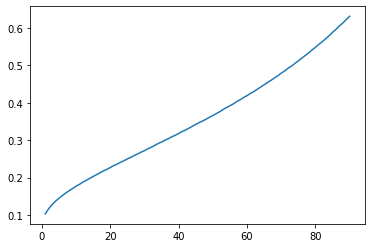

In [144]:
import matplotlib.pyplot as plt
mlist=[]
for angle in range(1,91):
    print("angle:"+str(angle))
    result=m2_examples_first_level(angle=float(angle/180)*math.pi*(1/2),tinitial=0.000,incre=0.001)
    mlist.append(result)
Xlist=[]
angle=1
for k in mlist:
    Xlist.append(angle)
    angle+=1
plt.plot(Xlist, mlist)

angle:1
delta:0.10800000000000008
angle:2
delta:0.1240000000000001
angle:3
delta:0.1360000000000001
angle:4
delta:0.1470000000000001
angle:5
delta:0.1560000000000001
angle:6
delta:0.16400000000000012
angle:7
delta:0.17200000000000013
angle:8
delta:0.17900000000000013
angle:9
delta:0.18600000000000014
angle:10
delta:0.19300000000000014
angle:11
delta:0.20000000000000015
angle:12
delta:0.20600000000000016
angle:13
delta:0.21200000000000016
angle:14
delta:0.21900000000000017
angle:15
delta:0.22500000000000017
angle:16
delta:0.23100000000000018
angle:17
delta:0.23700000000000018
angle:18
delta:0.2430000000000002
angle:19
delta:0.2490000000000002
angle:20
delta:0.25500000000000017
angle:21
delta:0.2600000000000002
angle:22
delta:0.2660000000000002
angle:23
delta:0.2720000000000002
angle:24
delta:0.2780000000000002
angle:25
delta:0.2840000000000002
angle:26
delta:0.2900000000000002
angle:27
delta:0.2960000000000002
angle:28
delta:0.3020000000000002
angle:29
delta:0.3080000000000002
angle:30


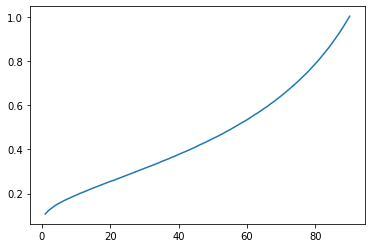

In [145]:
import matplotlib.pyplot as plt
mlist=[]
for angle in range(1,91):
    print("angle:"+str(angle))
    result=m2_examples_first_level(angle=float(angle/180)*math.pi*(1/2+0.151),tinitial=0.000,incre=0.001)
    mlist.append(result)
Xlist=[]
angle=1
for k in mlist:
    Xlist.append(angle)
    angle+=1
plt.plot(Xlist, mlist)

delta:0.10800000000000008
angle:1
conjectured:0.10796235692321833
error(%):0.03486685346126969%
delta:0.1240000000000001
angle:2
conjectured:0.12499072710492899
error(%):0.7926404845194523%
delta:0.1360000000000001
angle:3
conjectured:0.13769561734929486
error(%):1.231424341555816%
delta:0.1470000000000001
angle:4
conjectured:0.14839887779799937
error(%):0.9426471539113819%
delta:0.1560000000000001
angle:5
conjectured:0.15792141235934537
error(%):1.216688940808827%
delta:0.16400000000000012
angle:6
conjectured:0.16666044004713262
error(%):1.59632366648025%
delta:0.17200000000000013
angle:7
conjectured:0.17484209986257468
error(%):1.6255237524649013%
delta:0.17900000000000013
angle:8
conjectured:0.18260896339119237
error(%):1.9763341974955355%
delta:0.18600000000000014
angle:9
conjectured:0.19005751171487853
error(%):2.1348862658821988%
delta:0.19300000000000014
angle:10
conjectured:0.19725654964560024
error(%):2.1578749365978487%
delta:0.20000000000000015
angle:11
conjectured:0.2042571

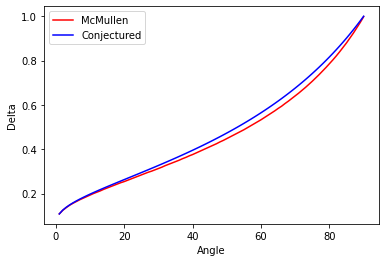

In [147]:
mlist=[]
conjecturedlist=[]
for angle in range(1,91):
    Angle=float(angle/180)*math.pi*(1/2)
    out=math.log(3)/math.log((1+(math.cos(Angle)*math.cos(Angle)))/(math.sin(Angle)*math.sin(Angle)))
    result=m2_examples_first_level(angle=float(angle/180)*math.pi*(1/2+0.15),tinitial=0.000,incre=0.001)
    print("angle:"+str(angle))
    print("conjectured:"+str(out))
    print("error(%):"+str(abs(out-result)/out*100)+"%")
    mlist.append(result)
    conjecturedlist.append(out)
Xlist=[]
angle=1
for k in mlist:
    Xlist.append(angle)
    angle+=1
plt.plot(Xlist, mlist, color='r', label='McMullen')
plt.plot(Xlist, conjecturedlist, color='b', label='Conjectured')
plt.xlabel("Angle")
plt.ylabel("Delta")
plt.legend()
plt.show()